# Le Mans 24 Hours, WEC, 2019

Recreating charts in Racecar Engineering.


*Series: Coding for Racecar Engineers.*

### Coding for Racecar Engineers

Many engineers are accustomed to fashioning their own tools from whatever happens to be at hand whenever the need arises. 

In this series of articles, we will look at how "coding", which is to say computer programming, can also be appropriated by engineers on as-and-when basis for helping them *get stuff done* with data and mathematical models.

Unlike the limitations of working with the physical properties of physical materials  will also see how code provides great flexibility as general purpose tool for building other tools. also automation

No programming or coding knowledge is assumed, nor is access to anything other than a computer browser and an internet connection.

So let's get started...

---

In [1]:
%matplotlib inline
import pandas as pd

In [2]:
url = 'http://fiawec.alkamelsystems.com/Results/08_2018-2019/08_LE%20MANS/276_FIA%20WEC/201906151500_Race/Hour%2024/23_Analysis_Race_Hour%2024.CSV'

In [3]:
laptimes = pd.read_csv(url, sep=';').dropna(how='all', axis=1)
laptimes.columns = [c.strip() for c in laptimes.columns]
laptimes.head()

,NUMBER,DRIVER_NUMBER,LAP_NUMBER,LAP_TIME,LAP_IMPROVEMENT,CROSSING_FINISH_LINE_IN_PIT,S1,S1_IMPROVEMENT,S2,S2_IMPROVEMENT,...,S1_LARGE,S2_LARGE,S3_LARGE,TOP_SPEED,DRIVER_NAME,PIT_TIME,CLASS,GROUP,TEAM,MANUFACTURER
0,1,3,1,3:28.871,0,NaN,35.433,0,1:19.342,0,...,0:35.433,1:19.342,1:34.096,327.8,Bruno SENNA,NaN,LMP1,NaN,Rebellion Racing,Rebellion
1,1,3,2,3:22.369,0,NaN,32.397,0,1:17.322,0,...,0:32.397,1:17.322,1:32.650,341.3,Bruno SENNA,NaN,LMP1,NaN,Rebellion Racing,Rebellion
2,1,3,3,3:20.900,0,NaN,32.067,0,1:16.869,0,...,0:32.067,1:16.869,1:31.964,337.0,Bruno SENNA,NaN,LMP1,NaN,Rebellion Racing,Rebellion
3,1,3,4,3:20.605,2,NaN,31.767,2,1:16.753,1,...,0:31.767,1:16.753,1:32.085,340.2,Bruno SENNA,NaN,LMP1,NaN,Rebellion Racing,Rebellion
4,1,3,5,3:20.983,0,NaN,32.032,0,1:16.983,0,...,0:32.032,1:16.983,1:31.968,339.1,Bruno SENNA,NaN,LMP1,NaN,Rebellion Racing,Rebellion


In [4]:
#Add the parent dir to the import path
import sys
sys.path.append("..")

#Import contents of the utils.py package in the parent directory
from py.utils import *

#Get laptimes in seconds
for i in ['S1', 'S2', 'S3', 'LAP_TIME']:
    laptimes['{}_S'.format(i)] = laptimes[i].apply(getTime)

#Tidy the data a little... car and driver number are not numbers
laptimes[['NUMBER','DRIVER_NUMBER']] = laptimes[['NUMBER','DRIVER_NUMBER']].astype(str)

#Find accumulated time in seconds
laptimes['ELAPSED_S']=laptimes['ELAPSED'].apply(getTime)

#Find position based on accumulated laptime
laptimes = laptimes.sort_values('ELAPSED_S')
laptimes['POS'] = laptimes.groupby('LAP_NUMBER')['ELAPSED_S'].rank()

#Find leader naively
laptimes['leader'] = laptimes['POS']==1

#Find lead lap number
laptimes['LEAD_LAP_NUMBER'] = laptimes['leader'].cumsum()

laptimes.head()

,NUMBER,DRIVER_NUMBER,LAP_NUMBER,LAP_TIME,LAP_IMPROVEMENT,CROSSING_FINISH_LINE_IN_PIT,S1,S1_IMPROVEMENT,S2,S2_IMPROVEMENT,...,TEAM,MANUFACTURER,S1_S,S2_S,S3_S,LAP_TIME_S,ELAPSED_S,POS,leader,LEAD_LAP_NUMBER
12251,7,1,1,3:22.215,0,NaN,33.075,0,1:17.762,0,...,Toyota Gazoo Racing,Toyota,33.075,77.762,91.378,202.215,202.215,1.0,True,1
13768,8,1,1,3:25.635,0,NaN,33.688,0,1:19.389,0,...,Toyota Gazoo Racing,Toyota,33.688,79.389,92.558,205.635,205.635,2.0,False,1
3504,3,3,1,3:27.370,0,NaN,34.010,0,1:18.604,0,...,Rebellion Racing,Rebellion,34.010,78.604,94.756,207.370,207.370,3.0,False,1
452,11,1,1,3:28.022,0,NaN,34.305,0,1:19.341,0,...,SMP Racing,BR Engineering,34.305,79.341,94.376,208.022,208.022,4.0,False,1
831,17,1,1,3:28.523,0,NaN,34.940,0,1:19.151,0,...,SMP Racing,BR Engineering,34.940,79.151,94.432,208.523,208.523,5.0,False,1


In [5]:
laptimes.columns

Index(['NUMBER', 'DRIVER_NUMBER', 'LAP_NUMBER', 'LAP_TIME', 'LAP_IMPROVEMENT',
       'CROSSING_FINISH_LINE_IN_PIT', 'S1', 'S1_IMPROVEMENT', 'S2',
       'S2_IMPROVEMENT', 'S3', 'S3_IMPROVEMENT', 'KPH', 'ELAPSED', 'HOUR',
       'S1_LARGE', 'S2_LARGE', 'S3_LARGE', 'TOP_SPEED', 'DRIVER_NAME',
       'PIT_TIME', 'CLASS', 'GROUP', 'TEAM', 'MANUFACTURER', 'S1_S', 'S2_S',
       'S3_S', 'LAP_TIME_S', 'ELAPSED_S', 'POS', 'leader', 'LEAD_LAP_NUMBER'],
      dtype='object')

## Mean laptime over 20 best laps


In [6]:
#selct out inlaps
#~laptimes['CROSSING_FINISH_LINE_IN_PIT'].isnull()

In [7]:
laptimes.groupby('NUMBER')['LAP_TIME_S'].nsmallest(20).groupby('NUMBER').mean().round(decimals=3).to_frame().head(10)


,LAP_TIME_S
NUMBER,
1,201.828
10,206.880
11,200.850
17,200.972
20,210.854
22,211.083
23,211.982
25,211.460
26,209.394


In [8]:
def fastest20pc(carlaps):
    num = int(carlaps.count() * 0.2)
    return carlaps.nsmallest(num).mean().round(decimals=3)

laptimes.groupby('NUMBER')['LAP_TIME_S'].apply(fastest20pc).to_frame().head()

,LAP_TIME_S
NUMBER,
1,202.965
10,206.028
11,201.966
17,201.427
20,212.168


In [9]:
laptimes.groupby('NUMBER')['LAP_TIME_S'].min().sort_values().to_frame().head()

,LAP_TIME_S
NUMBER,
7,197.297
8,198.397
3,198.720
11,199.785
17,200.273


## Rising Average

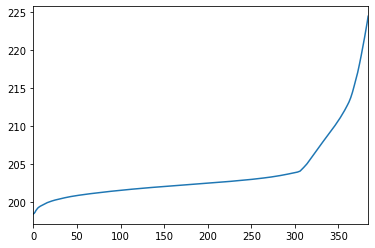

In [10]:
laptimes[laptimes['NUMBER']=='8']['LAP_TIME_S'].sort_values().expanding(min_periods=1).mean().reset_index(drop=True).plot();


In [11]:
LAST_LAP = laptimes['LAP_NUMBER'].max()
cols = ['NUMBER','TEAM', 'DRIVER_NAME', 'CLASS','LAP_NUMBER','ELAPSED']
top5 = laptimes[laptimes['LEAD_LAP_NUMBER']==LAST_LAP].sort_values(['LEAD_LAP_NUMBER', 'POS'])[cols].head(5).reset_index(drop=True)
top5

,NUMBER,TEAM,DRIVER_NAME,CLASS,LAP_NUMBER,ELAPSED
0,8,Toyota Gazoo Racing,Kazuki NAKAJIMA,LMP1,385,24:00:10.574
1,7,Toyota Gazoo Racing,Jose Maria LOPEZ,LMP1,385,24:00:27.546
2,11,SMP Racing,Stoffel VANDOORNE,LMP1,379,24:00:47.948
3,1,Rebellion Racing,Bruno SENNA,LMP1,376,24:01:52.069
4,3,Rebellion Racing,Gustavo MENEZES,LMP1,370,24:01:23.474


In [12]:
SELECTED = top5['NUMBER'].to_list() + ['17']

In [ ]:
laptimes['CAR_LAP_RANK'] = laptimes.sort_values(['NUMBER','LAP_TIME_S']).groupby('NUMBER').cumcount()

In [27]:
laptimes['CAR_LAP_RANKED_CUMSUM'] = laptimes.sort_values(['NUMBER','LAP_TIME_S']).groupby('NUMBER')['LAP_TIME_S'].cumsum()


In [32]:
#The rank count starts at 0
laptimes['CAR_LAP_RANKED_CUMAV'] = (laptimes['CAR_LAP_RANKED_CUMSUM'] / (laptimes['CAR_LAP_RANK']+1)).round(decimals=3)



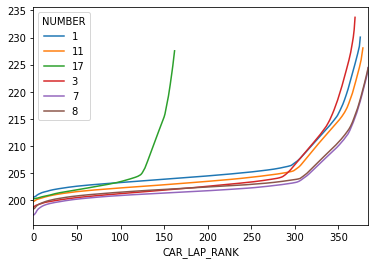

In [33]:
laptimes[laptimes['NUMBER'].isin(SELECTED)].pivot(index='CAR_LAP_RANK',
                                                         columns='NUMBER', 
                                                         values='CAR_LAP_RANKED_CUMAV').plot();

### Advanced Technique

The *pandas* package contains a lot of powerful tools for working with tabular datasets, including predefined ways of calculating cumuluative averages.

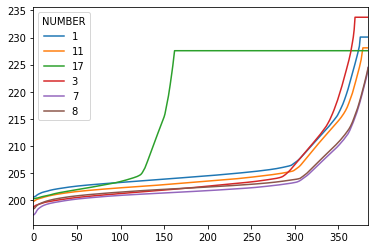

In [38]:
tmp =  laptimes[laptimes['NUMBER'].isin(SELECTED)].pivot(index='CAR_LAP_RANK',
                                                         columns='NUMBER', 
                                                         values='LAP_TIME_S')
tmp.expanding(min_periods=1).mean().reset_index(drop=True).plot();

In [39]:
tmp.tail()

NUMBER,1,11,17,3,7,8
CAR_LAP_RANK,,,,,,
380,NaN,NaN,NaN,NaN,457.645,460.991
381,NaN,NaN,NaN,NaN,462.964,465.831
382,NaN,NaN,NaN,NaN,467.654,465.981
383,NaN,NaN,NaN,NaN,509.351,498.329
384,NaN,NaN,NaN,NaN,654.798,516.061


In [40]:
tmp.expanding(min_periods=1).mean().tail()

NUMBER,1,11,17,3,7,8
CAR_LAP_RANK,,,,,,
380,230.08529,228.09485,227.569233,233.739119,221.345877,221.691265
381,230.08529,228.09485,227.569233,233.739119,221.978385,222.330374
382,230.08529,228.09485,227.569233,233.739119,222.619836,222.966538
383,230.08529,228.09485,227.569233,233.739119,223.366531,223.683628
384,230.08529,228.09485,227.569233,233.739119,224.487132,224.443049


The *pandas* dataframe `mask()` method allows us to test a particular condition for each cell; if the condition evaluates as `False`, we retain the original value, but if it evaulates as `True` we replace the cell value with a  corresponding value also passed to the `mask()` method.

If we pass a dataframe into the mask method with the same structure (that is, the same number of rows and columns) as the dataframe we are applying the mask to, we can essentially define a test for each cell, as well as a potential replacement value for each cell.

TO DO

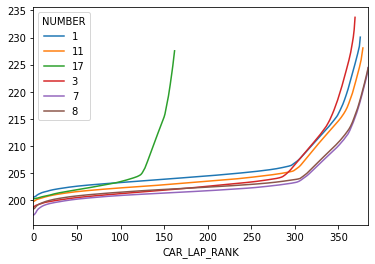

In [16]:
tmp.expanding(min_periods=1).mean().mask(tmp.isnull(),tmp).plot();

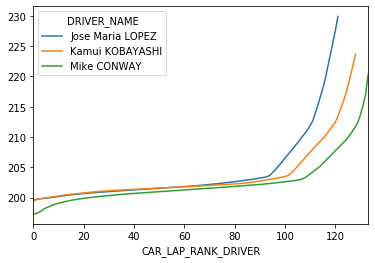

In [17]:
laptimes['CAR_LAP_RANK_DRIVER'] = laptimes.sort_values(['NUMBER','DRIVER_NAME','LAP_TIME_S']).groupby(['NUMBER','DRIVER_NAME']).cumcount()


tmp2 =  laptimes[laptimes['NUMBER']=='7'].pivot(index='CAR_LAP_RANK_DRIVER',
                                                         columns='DRIVER_NAME', 
                                                         values='LAP_TIME_S')


tmp2.expanding(min_periods=1).mean().mask(tmp2.isnull(),tmp2).plot();

In [18]:
### Stints

In [19]:
#https://stackoverflow.com/a/26914036/454773
#https://stackoverflow.com/a/38064349/454773 generalised shift
df = laptimes[laptimes['NUMBER']=='7'][:]
df['CAR_LEG'] =  ( df['DRIVER_NAME']!= df['DRIVER_NAME'].shift()).astype('int').cumsum()
df2 =pd.DataFrame({'LAP_START' : df.groupby('CAR_LEG')['LAP_NUMBER'].first(), 
              'LAP_END' : df.groupby('CAR_LEG')['LAP_NUMBER'].last(),
              'CONSECUTIVE' : df.groupby('CAR_LEG')['LAP_NUMBER'].size(), 
              'NAME' : df.groupby('CAR_LEG')['DRIVER_NAME'].first()}).reset_index(drop=True)
df2

,LAP_START,LAP_END,CONSECUTIVE,NAME
0,1,43,43,Mike CONWAY
1,44,87,44,Kamui KOBAYASHI
2,88,133,46,Jose Maria LOPEZ
3,134,179,46,Mike CONWAY
4,180,224,45,Kamui KOBAYASHI
5,225,269,45,Jose Maria LOPEZ
6,270,314,45,Mike CONWAY
7,315,354,40,Kamui KOBAYASHI
8,355,385,31,Jose Maria LOPEZ


In [20]:
df = laptimes[laptimes['NUMBER']=='7'][:]
df['CAR_STINT'] =  ( df['CROSSING_FINISH_LINE_IN_PIT'].shift()=='B').astype('int').cumsum()
df2 =pd.DataFrame({'LAP_START' : df.groupby('CAR_STINT')['LAP_NUMBER'].first(), 
              'LAP_END' : df.groupby('CAR_STINT')['LAP_NUMBER'].last(),
              'CONSECUTIVE' : df.groupby('CAR_STINT')['LAP_NUMBER'].size(), 
              'NAME' : df.groupby('CAR_STINT')['DRIVER_NAME'].first()}).reset_index(drop=True)
df2.head()

,LAP_START,LAP_END,CONSECUTIVE,NAME
0,1,10,10,Mike CONWAY
1,11,21,11,Mike CONWAY
2,22,32,11,Mike CONWAY
3,33,43,11,Mike CONWAY
4,44,54,11,Kamui KOBAYASHI


In [21]:
df2['CONSECUTIVE'].max(), df2.groupby('NAME')['CONSECUTIVE'].max()

(12, NAME
 Jose Maria LOPEZ    12
 Kamui KOBAYASHI     12
 Mike CONWAY         12
 Name: CONSECUTIVE, dtype: int64)

In [22]:
laptimes.groupby('NUMBER')[['TOP_SPEED','LAP_NUMBER']].max().head()

,TOP_SPEED,LAP_NUMBER
NUMBER,,
1,343.4,376
10,336.0,76
11,350.1,379
17,347.8,163
20,333.9,356


In [25]:
laptimes.groupby('NUMBER')[['S1_S','S2_S','S3_S']].min().head()

,S1_S,S2_S,S3_S
NUMBER,,,
1,31.767,76.712,91.731
10,32.198,77.658,92.694
11,31.669,75.732,91.437
17,31.728,76.089,91.524
20,32.091,80.235,95.945
